# Size of the space spanned by a bunch of seaweeds
---------------
One would like to check whether the set of solutions is spanned by the set of all possible seaweeds. Since building all possible seaweeds for a given factor graph might take an exponential time, one only builds a a finite number of seaweeds $T$ by picking at random a seed among the non-core variables, and growing a seaweed starting from that seed.

At fixed rate $R$, for increasing graph sizes $n$, one builds a set of $G$ factor graphs with $n$ variables and $m=(1-R)n$ check nodes. The variables have fixed degree $2$. 

For each factor graph one removes $b$ check nodes ($b$-reduction), here with $b=1$. Then one builds the $n\times T$ matrix $M$ in which each column corresponds to a seaweed grown from a seed chosen at random from the set of non-core variables (here $T=n$). Then one computes the rank of the matrix $M$ and compare it to the size of the solution set $n-rk(H)$

In [30]:
include("../code/headers.jl")

mpldefault (generic function with 1 method)

Set parameters

In [51]:
n_vals = [50, 100, 500] # increasing graph sizes
G = 10 # Number of graphs to average over
R = 0.7 # Fixed rate
b = 1 # Number of factors removed during b-reduction

1

Build the seaweed and compute the rank of the matrix $M$

In [52]:
function avg_dimspanseaweed(G::Int, nvariables::Int, R::Float64, b::Int, nseaweeds::Int, j::Int, sz_spansw, sz_solset)
    nfactors = floor(Int, nvariables*(1-R))
    for g in 1:G
        fg = ldpc_graph(2, nvariables, nfactors)
        breduction!(fg, 1)
        depths,_,_ = lr(fg)
        isincore = (depths .== 0)
        noncore_vars = (1:fg.n)[.!isincore]
        M = zeros(Int, nvariables, nseaweeds)
        # Extract `nseaweeds` seeds without replacement
        seeds = sample(noncore_vars, nseaweeds, replace=false)
        for i in 1:nseaweeds
#             seed = rand(noncore_vars)
            seed = seeds[i]
            sw = seaweed(fg, seed, depths, isincore)
            M[(i-1)*nvariables+1:i*nvariables]=sw    
        end
        #test = parity(fg, M)
        sz_spansw[j][g] = gfrank(M)
        sz_solset[j][g] = nvariables - gfrank(adjmat(fg))
    end
    return nothing
end

avg_dimspanseaweed (generic function with 1 method)

In [53]:
sz_spansw = [zeros(G) for j in eachindex(n_vals)]
sz_solset = [zeros(G) for j in eachindex(n_vals)]
for j in eachindex(n_vals)
    avg_dimspanseaweed(G, n_vals[j], R, b, n_vals[j], j, sz_spansw, sz_solset)
    println("done for n = ", n_vals[j])
end

done for n = 50
done for n = 100
done for n = 500


Average over the set of graphs

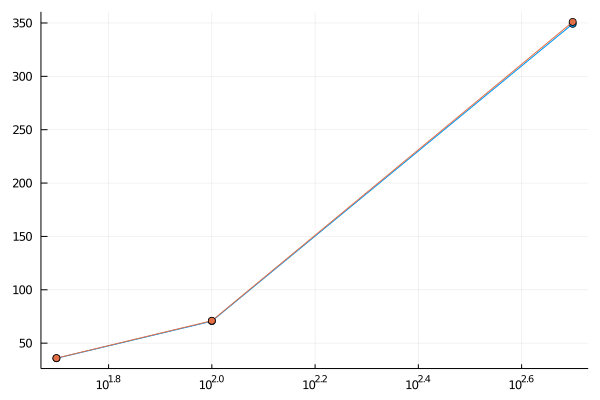

In [54]:
avg_spansw = [mean(sz_spansw[j]) for j in eachindex(n_vals)]
sd_spansw = [std(sz_spansw[j])/sqrt(G) for j in eachindex(n_vals)]
avg_solset = [mean(sz_solset[j]) for j in eachindex(n_vals)]
sd_solset = [std(sz_solset[j])/sqrt(G) for j in eachindex(n_vals)]
plot(n_vals, avg_spansw, ribbon=sd_spansw, label="", markershape=:circle, xscale=:log10)
plot!(n_vals, avg_solset, ribbon=sd_solset, label="", markershape=:circle, xscale=:log10)

In [55]:
[avg_spansw avg_solset]

3×2 Array{Float64,2}:
  35.8   36.0
  70.6   71.0
 349.2  351.0